### Checking Temperature in Areas Contrasted with Alcohol Consumption

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [3]:
ac_df = pd.read_csv('../data/modified/2015_states_sorted.csv')
ac_df = ac_df.drop(columns=['Unnamed: 0','year'])

ac_df = np.round(ac_df, decimals = 2)
ac_df
us_state_abbrev = {
'alabama': 'AL', 'alaska': 'AK', 'arizona': 'AZ', 'arkansas': 'AR', 'california': 'CA', 'colorado': 'CO',
'connecticut': 'CT', 'delaware': 'DE', 'florida': 'FL', 'georgia': 'GA', 'hawaii': 'HI', 'idaho': 'ID',
'illinois': 'IL', 'indiana': 'IN', 'iowa': 'IA', 'kansas': 'KS', 'kentucky': 'KY', 'louisiana': 'LA',
'maine': 'ME', 'maryland': 'MD', 'massachusetts': 'MA', 'michigan': 'MI', 'minnesota': 'MN', 'mississippi': 'MS',
'missouri': 'MO', 'montana': 'MT', 'nebraska': 'NE', 'nevada': 'NV', 'new hampshire': 'NH', 'new Jersey': 'NJ',
'new mexico': 'NM', 'new york': 'NY', 'north carolina': 'NC', 'north dakota': 'ND', 'ohio': 'OH', 'oklahoma': 'OK',
'oregon': 'OR', 'pennsylvania': 'PA', 'phode island': 'RI', 'south carolina': 'SC', 'south dakota': 'SD',
'tennessee': 'TN', 'texas': 'TX', 'utah': 'UT', 'vermont': 'VT', 'virginia': 'VA', 'washington': 'WA',
'west virginia': 'WV', 'wisconsin': 'WI', 'wyoming': 'WY'}

ac_df['STATE'] = ac_df['state'].map(us_state_abbrev)
ac_df.columns.values[0] = 'STATE'

t_df = pd.read_csv('../data/modified/2015_state_temperatures.csv')

t_df = t_df.drop(columns=['CITY','Unnamed: 0'])
t_annual = t_df[['ANN','STATE']]
t_annual['STATE'] = t_annual['STATE'].astype('string')
type(t_annual['STATE'][0])




/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


str

In [4]:
ac_df.drop(['state'], axis = 1, inplace = True)

KeyError: "['state'] not found in axis"

In [ ]:
ac_df['STATE'] = ac_df['STATE'].astype('string')

In [5]:
ac_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 10 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   STATE                                  56 non-null     object 
 1   ethanol_beer_gallons_per_capita        56 non-null     float64
 2   ethanol_wine_gallons_per_capita        56 non-null     float64
 3   ethanol_spirit_gallons_per_capita      56 non-null     float64
 4   ethanol_all_drinks_gallons_per_capita  56 non-null     float64
 5   number_of_beers                        56 non-null     float64
 6   number_of_glasses_wine                 56 non-null     float64
 7   number_of_shots_liquor                 56 non-null     float64
 8   number_of_drinks_total                 56 non-null     float64
 9   STATE                                  48 non-null     object 
dtypes: float64(8), object(2)
memory usage: 4.5+ KB


### Merge Dataframes

In [6]:
left_merge = ac_df.merge(t_annual, how='left', on = 'STATE')

ValueError: The column label 'STATE' is not unique.

In [7]:
left_merge

NameError: name 'left_merge' is not defined

In [8]:
# send_left = left_merge.to_csv('../data/modified/left_merge_table.csv')
# send_left

In [9]:
# mean_by_state = left_merge.groupby('STATE').mean()
# mean_by_state.to_csv('../data/modified/left_merge_table.csv')

### Statisical Comparison and Graphing

In [10]:
m_state = mean_by_state.copy()
m_state.head(10)

m_state.columns

# ann_min = m_state['ANN'].min
# ann_mean = m_state['ANN'].mean
# ann_median = m_state['ANN'].median
# ann_max = m_state['ANN'].max

# total_min = m_state['number_of_drinks_total'].min
# total_mean = m_state['number_of_drinks_total'].mean
# total_median = m_state['number_of_drinks_total'].median
# total_max = m_state['number_of_drinks_total'].max


# bgper_min = m_state['ethanol_beer_gallons_per_capita'].min
# wgper_min = m_state['ethanol_wine_gallons_per_capita'].min
# sgper_min = m_state['ethanol_spirit_gallons_per_capita'].min

# bgper_mean = m_state['ethanol_beer_gallons_per_capita'].mean
# wgper_mean = m_state['ethanol_wine_gallons_per_capita'].mean
# sgper_mean = m_state['ethanol_spirit_gallons_per_capita'].mean

# bgper_median = m_state['ethanol_beer_gallons_per_capita'].median
# wgper_median = m_state['ethanol_wine_gallons_per_capita'].median
# sgper_median = m_state['ethanol_spirit_gallons_per_capita'].median

# bgper_max = m_state['ethanol_beer_gallons_per_capita'].max
# wgper_max = m_state['ethanol_wine_gallons_per_capita'].max
# sgper_max = m_state['ethanol_spirit_gallons_per_capita'].max



NameError: name 'mean_by_state' is not defined

### MannWhitneyU Test

In [11]:
stats.mannwhitneyu(m_state['ANN'], m_state['number_of_drinks_total'])

NameError: name 'm_state' is not defined

In [12]:
stats.pearsonr(m_state['ANN'], m_state['ethanol_beer_gallons_per_capita']) 

NameError: name 'm_state' is not defined

In [13]:
stats.pearsonr(m_state['ANN'], m_state['ethanol_wine_gallons_per_capita']) 

NameError: name 'm_state' is not defined

In [14]:
stats.pearsonr(m_state['ANN'], m_state['ethanol_spirit_gallons_per_capita']) 

NameError: name 'm_state' is not defined

### Pearsonr

In [15]:
stats.pearsonr(m_state['ANN'], m_state['number_of_drinks_total']) 

NameError: name 'm_state' is not defined

In [16]:
stats.pearsonr(m_state['ANN'], m_state['ethanol_beer_gallons_per_capita']) 

NameError: name 'm_state' is not defined

In [17]:
stats.pearsonr(m_state['ANN'], m_state['ethanol_wine_gallons_per_capita']) 

NameError: name 'm_state' is not defined

In [18]:
stats.pearsonr(m_state['ANN'], m_state['ethanol_spirit_gallons_per_capita']) 

NameError: name 'm_state' is not defined

### Spearmanr

In [19]:
stats.spearmanr(m_state['ANN'], m_state['number_of_drinks_total']) 

NameError: name 'm_state' is not defined

In [75]:
stats.spearmanr(m_state['ANN'], m_state['ethanol_beer_gallons_per_capita']) 

SpearmanrResult(correlation=-0.06824353772969358, pvalue=0.6448846750823399)

In [76]:
stats.spearmanr(m_state['ANN'], m_state['ethanol_wine_gallons_per_capita']) 

SpearmanrResult(correlation=-0.4141200157720395, pvalue=0.003432453092660785)

In [77]:
stats.spearmanr(m_state['ANN'], m_state['ethanol_spirit_gallons_per_capita']) 

SpearmanrResult(correlation=-0.19530677103268032, pvalue=0.1834162907770079)

### Scatter Plots

In [ ]:
plt.scatter(m_state['ethanol_beer_gallons_per_capita'], m_state['ANN']);
plt.scatter(m_state['ethanol_wine_gallons_per_capita'], m_state['ANN']);
plt.scatter(m_state['ethanol_spirit_gallons_per_capita'], m_state['ANN']);

In [ ]:
plt.scatter(m_state['ethanol_wine_gallons_per_capita'], m_state['ANN']);

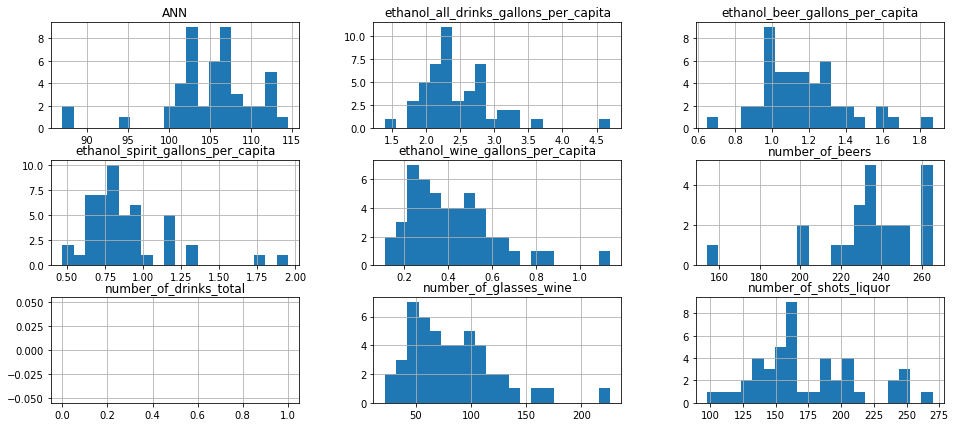

In [80]:
bins = 20
# plt.hlines('m_state[ANN].median',0,10)
m_state[m_state <= 270].hist(bins=bins, figsize=(16,7));

In [81]:
# m_state['number_of_drinks_total'].hist(bins = bins);

In [82]:
m_state.mean()

ethanol_beer_gallons_per_capita            1.166458
ethanol_wine_gallons_per_capita            0.413542
ethanol_spirit_gallons_per_capita          0.888125
ethanol_all_drinks_gallons_per_capita      2.468333
number_of_beers                          276.494167
number_of_glasses_wine                    82.067292
number_of_shots_liquor                   184.396042
number_of_drinks_total                   526.578333
ANN                                      105.138738
dtype: float64

In [83]:
m_state.sort_values(by = 'ANN',ascending= False).head(5)

,ethanol_beer_gallons_per_capita,ethanol_wine_gallons_per_capita,ethanol_spirit_gallons_per_capita,ethanol_all_drinks_gallons_per_capita,number_of_beers,number_of_glasses_wine,number_of_shots_liquor,number_of_drinks_total,ANN
STATE,,,,,,,,,
AR,0.97,0.22,0.65,1.83,229.93,43.66,134.96,390.40,114.5
OK,1.07,0.19,0.62,1.89,253.63,37.71,128.73,403.20,113.0
KS,1.03,0.14,0.74,1.91,244.15,27.78,153.64,407.47,112.6
MO,1.17,0.39,0.97,2.53,277.33,77.40,201.39,539.73,112.0
SD,1.49,0.29,1.03,2.81,353.19,57.55,213.85,599.47,112.0


No handles with labels found to put in legend.


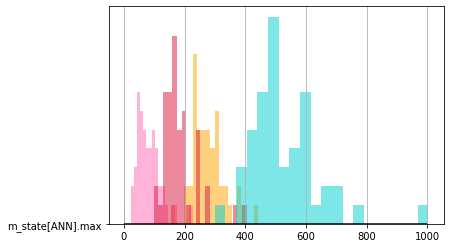

In [89]:
m_state['ethanol_beer_gallons_per_capita'].hist(color='goldenrod', bins=20, alpha=0.5);
m_state['ethanol_wine_gallons_per_capita'].hist(color='purple', bins=20, alpha=0.5);
m_state['ethanol_spirit_gallons_per_capita'].hist(color='mediumslateblue', bins=20, alpha=0.5);
m_state['ethanol_all_drinks_gallons_per_capita'].hist(color='cornflowerblue', bins=20, alpha=0.5);
m_state['number_of_beers'].hist(color='orange', bins=20, alpha=0.5);
m_state['number_of_glasses_wine'].hist(color='hotpink', bins=20, alpha=0.5);
m_state['number_of_shots_liquor'].hist(color='crimson', bins=20, alpha=0.5);
m_state['number_of_drinks_total'].hist(color='darkturquoise', bins=20, alpha=0.5);
plt.hlines('m_state[ANN].max',0, 1000)
ax.legend();

In [1]:
np.random.seed(19680801)

# example data
mu = m_state['ANN'].mean()  # mean of distribution
sigma = m_state['ANN'].std()  # standard deviation of distribution
x = mu + sigma * np.random.randn(437)

num_bins = 50

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(x, num_bins, density=True)

# add a 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--')
ax.set_xlabel('Smarts')
ax.set_ylabel('Probability density')
ax.set_title(r'Histogram of Annual Mean: $\mu=105.1$, $\sigma=5.55$')
plt.lines(102, 0, 10)
# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

NameError: name 'np' is not defined

In [86]:
# df = m_state['number_of_shots_liquor'].values, columns=['A','B','C','D']
# scatter_matrix(df, alpha = 0.2)

In [87]:
sorted(m_state['ANN'].values[:3])

[87.55, 106.0, 114.5]

In [88]:
sorted(m_state['ANN'].values[3:6])

[103.2, 110.15384615384616, 111.75]